<a href="https://colab.research.google.com/github/Vamsikrishna1804/Vamsikrishnabharghava_INFO5731_Spring2021/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import vectorize
import pandas as pd
import spacy
import re

In [4]:
trump = pd.read_csv('dtrump_cleaneddata.csv')
biden = pd.read_csv('joe_cleaneddata.csv')

In [5]:
print(len(trump))
print(len(biden))

1193
972


In [6]:
print(trump.head(5))
print(biden.head(5))

   Unnamed: 0       created_at  ...                   country collected_at
0           2  10/15/2020 0:00  ...  United States of America      00:00.7
1           3  10/15/2020 0:00  ...                       NaN      00:01.1
2           4  10/15/2020 0:00  ...  United States of America      00:01.5
3           5  10/15/2020 0:00  ...  United States of America      00:01.9
4           7  10/15/2020 0:00  ...  United States of America      00:02.6

[5 rows x 6 columns]
   Unnamed: 0       created_at  ...                   country collected_at
0           1  10/15/2020 0:00  ...                       NaN      00:00.5
1           2  10/15/2020 0:00  ...  United States of America      00:01.0
2           3  10/15/2020 0:00  ...                       NaN      00:01.6
3           4  10/15/2020 0:00  ...  United States of America      00:02.1
4           5  10/15/2020 0:00  ...                       NaN      00:02.6

[5 rows x 6 columns]


In [22]:
import spacy.cli
 #spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

In [23]:
stopwords = nlp.Defaults.stop_words

In [24]:
trump_cleaned_text = []
biden_cleaned_text = []
trump_lemma_text = []
biden_lemma_text = []
for item in trump['tweet']:
    item = re.sub(r'[^a-zA-Z0-9 -]', '', item)
    doc = nlp(item)
    text = [x.text for x in doc if x.text not in stopwords]
    lemmaText = [x.lemma_ for x in doc if x.text not in stopwords]
    trump_cleaned_text.append(' '.join(text))
    trump_lemma_text.append(" ".join(lemmaText))
for item in biden['tweet']:
    item = re.sub(r'[^a-zA-Z0-9 -]', '', item)
    doc = nlp(item)
    text = [x.text for x in doc if x.text not in stopwords]
    lemmaText = [x.lemma_ for x in doc if x.text not in stopwords]
    biden_cleaned_text.append(' '.join(text))
    biden_lemma_text.append(" ".join(lemmaText))

In [25]:
print(trump_cleaned_text[0])
print(biden_cleaned_text[0])

Trump As student I hear years years I heard China In 2019 And 15 nt know I asked said sir nt know But millions Like 300 millionUm What
HunterBiden HunterBidenEmails JoeBiden JoeBidenMustStepDown httpstco9enmxWvePm


In [26]:
print(trump_lemma_text[0])
print(biden_lemma_text[0])

Trump as student -PRON- hear year year -PRON- hear China in 2019 and 15 not know -PRON- ask say sir not know but million like 300 millionum what
HunterBiden hunterbidenemails JoeBiden joebidenmuststepdown httpstco9enmxwvepm


In [28]:
trump['cleanedText'] = trump_cleaned_text
trump['lemmatizedText'] = trump_lemma_text
biden['cleanedText'] = biden_cleaned_text
biden['lemmatizedText'] = biden_lemma_text

In [29]:
corpus = trump_lemma_text
corpus.extend(biden_lemma_text)

In [66]:
trump_df=pd.read_csv('dtrump_cleaneddata.csv')
trump_df


,Unnamed: 0,created_at,tweet,user_name,country,collected_at
0,2,10/15/2020 0:00,"#Trump: As a student I used to hear for years,...",snarke,United States of America,00:00.7
1,3,10/15/2020 0:00,2 hours since last tweet from #Trump! Maybe he...,Trumpytweeter,NaN,00:01.1
2,4,10/15/2020 0:00,You get a tie! And you get a tie! #Trump ‘s ra...,Rana Abtar - رنا أبتر,United States of America,00:01.5
3,5,10/15/2020 0:00,@CLady62 Her 15 minutes were over long time ag...,Farris Flagg,United States of America,00:01.9
4,7,10/15/2020 0:00,@DeeviousDenise @realDonaldTrump @nypost There...,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,United States of America,00:02.6
...,...,...,...,...,...,...
1188,1394,10/15/2020 1:29,Politics has become 100% corruption because go...,bitcoin,NaN,08:48.8
1189,1395,10/15/2020 1:29,#Trump #BidenTownHall #BidenHarris #Biden #Bur...,Cheryl,NaN,08:48.5
1190,1396,10/15/2020 1:29,@BrunoStagno And lets not forget... #MBS silen...,GryphonsPerch,NaN,08:49.2
1191,1398,10/15/2020 1:30,“U.S. President Donald #Trump noted that the W...,PanAm Post,United States of America,08:49.6


In [67]:
biden_df=pd.read_csv('joe_cleaneddata.csv')
biden_df


,Unnamed: 0,created_at,tweet,user_name,country,collected_at
0,1,10/15/2020 0:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,Cheri A. 🇺🇸,NaN,00:00.5
1,2,10/15/2020 0:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Flag Waver,United States of America,00:01.0
2,3,10/15/2020 0:00,@chrislongview Watching and setting dvr. Let’s...,Michelle Ferg,NaN,00:01.6
3,4,10/15/2020 0:00,#censorship #HunterBiden #Biden #BidenEmails #...,the Gold State,United States of America,00:02.1
4,5,10/15/2020 0:00,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",Dose of Dissonance,NaN,00:02.6
...,...,...,...,...,...,...
967,1095,10/15/2020 1:11,"@eliascaress ""We are from Scranton, PA we will...",Parker,NaN,09:40.5
968,1096,10/15/2020 1:11,https://t.co/KkFtJxrMMb inside Joe Biden’s $4....,robert boyer,NaN,09:41.5
969,1097,10/15/2020 1:11,#HunterBiden #JoeBiden #Trump2020 \n#Electio...,Massive Dynamyx 🏴󠁧󠁢󠁥󠁮󠁧󠁿 ➐,NaN,09:41.0
970,1098,10/15/2020 1:11,GOT OUR MAIL-IN BALLOTS TODAY!!!\n\n#JoeBiden ...,g flores,NaN,09:42.0


In [63]:
from textblob import TextBlob

In [64]:
#calculation of polarities for each tweet
def getsubjectivityoftext(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getpolarityoftext(tweet):
  return TextBlob(tweet).sentiment.polarity

In [68]:
trump_df['Subjectivity'] = trump_df['tweet'].apply(getsubjectivityoftext)
trump_df['Polarity'] = trump_df['tweet'].apply(getpolarityoftext)
trump_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity
0,2,10/15/2020 0:00,"#Trump: As a student I used to hear for years,...",snarke,United States of America,00:00.7,0.333333,0.333333
1,3,10/15/2020 0:00,2 hours since last tweet from #Trump! Maybe he...,Trumpytweeter,NaN,00:01.1,0.252222,0.076667
2,4,10/15/2020 0:00,You get a tie! And you get a tie! #Trump ‘s ra...,Rana Abtar - رنا أبتر,United States of America,00:01.5,0.000000,0.000000
3,5,10/15/2020 0:00,@CLady62 Her 15 minutes were over long time ag...,Farris Flagg,United States of America,00:01.9,0.416667,-0.155208
4,7,10/15/2020 0:00,@DeeviousDenise @realDonaldTrump @nypost There...,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,United States of America,00:02.6,0.523810,0.178571
...,...,...,...,...,...,...,...,...
1188,1394,10/15/2020 1:29,Politics has become 100% corruption because go...,bitcoin,NaN,08:48.8,0.100000,0.000000
1189,1395,10/15/2020 1:29,#Trump #BidenTownHall #BidenHarris #Biden #Bur...,Cheryl,NaN,08:48.5,0.000000,0.000000
1190,1396,10/15/2020 1:29,@BrunoStagno And lets not forget... #MBS silen...,GryphonsPerch,NaN,08:49.2,1.000000,-0.875000
1191,1398,10/15/2020 1:30,“U.S. President Donald #Trump noted that the W...,PanAm Post,United States of America,08:49.6,0.500000,0.000000


In [69]:
biden_df['Subjectivity'] = biden_df['tweet'].apply(getsubjectivityoftext)
biden_df['Polarity'] = biden_df['tweet'].apply(getpolarityoftext)
biden_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity
0,1,10/15/2020 0:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,Cheri A. 🇺🇸,NaN,00:00.5,0.000000,0.000000
1,2,10/15/2020 0:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Flag Waver,United States of America,00:01.0,0.000000,0.000000
2,3,10/15/2020 0:00,@chrislongview Watching and setting dvr. Let’s...,Michelle Ferg,NaN,00:01.6,0.000000,0.000000
3,4,10/15/2020 0:00,#censorship #HunterBiden #Biden #BidenEmails #...,the Gold State,United States of America,00:02.1,0.000000,0.000000
4,5,10/15/2020 0:00,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",Dose of Dissonance,NaN,00:02.6,0.966667,0.039583
...,...,...,...,...,...,...,...,...
967,1095,10/15/2020 1:11,"@eliascaress ""We are from Scranton, PA we will...",Parker,NaN,09:40.5,0.535714,0.446429
968,1096,10/15/2020 1:11,https://t.co/KkFtJxrMMb inside Joe Biden’s $4....,robert boyer,NaN,09:41.5,0.291667,0.225000
969,1097,10/15/2020 1:11,#HunterBiden #JoeBiden #Trump2020 \n#Electio...,Massive Dynamyx 🏴󠁧󠁢󠁥󠁮󠁧󠁿 ➐,NaN,09:41.0,0.000000,0.000000
970,1098,10/15/2020 1:11,GOT OUR MAIL-IN BALLOTS TODAY!!!\n\n#JoeBiden ...,g flores,NaN,09:42.0,0.000000,0.000000


In [72]:
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
      return 'Neutral'
  else:
    return 'Positive'

trump_df['Analysis']= trump_df['Polarity'].apply(getAnalysis)
#trump_df.to_excel('Trumptweets_withpolarity.xlsx',engine='openpyxl')
trump_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity,Analysis
0,2,10/15/2020 0:00,"#Trump: As a student I used to hear for years,...",snarke,United States of America,00:00.7,0.333333,0.333333,Positive
1,3,10/15/2020 0:00,2 hours since last tweet from #Trump! Maybe he...,Trumpytweeter,NaN,00:01.1,0.252222,0.076667,Positive
2,4,10/15/2020 0:00,You get a tie! And you get a tie! #Trump ‘s ra...,Rana Abtar - رنا أبتر,United States of America,00:01.5,0.000000,0.000000,Neutral
3,5,10/15/2020 0:00,@CLady62 Her 15 minutes were over long time ag...,Farris Flagg,United States of America,00:01.9,0.416667,-0.155208,Negative
4,7,10/15/2020 0:00,@DeeviousDenise @realDonaldTrump @nypost There...,Stacey Gulledge 🇺🇸 Patriot ♥️ KAG 🙏 👮‍♀️♥️,United States of America,00:02.6,0.523810,0.178571,Positive
...,...,...,...,...,...,...,...,...,...
1188,1394,10/15/2020 1:29,Politics has become 100% corruption because go...,bitcoin,NaN,08:48.8,0.100000,0.000000,Neutral
1189,1395,10/15/2020 1:29,#Trump #BidenTownHall #BidenHarris #Biden #Bur...,Cheryl,NaN,08:48.5,0.000000,0.000000,Neutral
1190,1396,10/15/2020 1:29,@BrunoStagno And lets not forget... #MBS silen...,GryphonsPerch,NaN,08:49.2,1.000000,-0.875000,Negative
1191,1398,10/15/2020 1:30,“U.S. President Donald #Trump noted that the W...,PanAm Post,United States of America,08:49.6,0.500000,0.000000,Neutral


In [73]:
biden_df['Analysis']= biden_df['Polarity'].apply(getAnalysis)
#biden_df.to_excel('Trumptweets_withpolarity.xlsx',engine='openpyxl')
biden_df

,Unnamed: 0,created_at,tweet,user_name,country,collected_at,Subjectivity,Polarity,Analysis
0,1,10/15/2020 0:00,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,Cheri A. 🇺🇸,NaN,00:00.5,0.000000,0.000000,Neutral
1,2,10/15/2020 0:00,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Flag Waver,United States of America,00:01.0,0.000000,0.000000,Neutral
2,3,10/15/2020 0:00,@chrislongview Watching and setting dvr. Let’s...,Michelle Ferg,NaN,00:01.6,0.000000,0.000000,Neutral
3,4,10/15/2020 0:00,#censorship #HunterBiden #Biden #BidenEmails #...,the Gold State,United States of America,00:02.1,0.000000,0.000000,Neutral
4,5,10/15/2020 0:00,"""IS THIS WRONG??!!"" Cory Booker's BRILLIANT Fi...",Dose of Dissonance,NaN,00:02.6,0.966667,0.039583,Positive
...,...,...,...,...,...,...,...,...,...
967,1095,10/15/2020 1:11,"@eliascaress ""We are from Scranton, PA we will...",Parker,NaN,09:40.5,0.535714,0.446429,Positive
968,1096,10/15/2020 1:11,https://t.co/KkFtJxrMMb inside Joe Biden’s $4....,robert boyer,NaN,09:41.5,0.291667,0.225000,Positive
969,1097,10/15/2020 1:11,#HunterBiden #JoeBiden #Trump2020 \n#Electio...,Massive Dynamyx 🏴󠁧󠁢󠁥󠁮󠁧󠁿 ➐,NaN,09:41.0,0.000000,0.000000,Neutral
970,1098,10/15/2020 1:11,GOT OUR MAIL-IN BALLOTS TODAY!!!\n\n#JoeBiden ...,g flores,NaN,09:42.0,0.000000,0.000000,Neutral


In [74]:
y = ['Trump']*len(trump)
y.extend(['Biden']*len(biden))

In [75]:
vectorizer = TfidfVectorizer()

In [76]:
x = vectorizer.fit_transform(corpus)

In [77]:
column_names = vectorizer.get_feature_names()

In [78]:
X = pd.DataFrame(x.toarray())

In [79]:
X.columns = column_names
X.index = corpus

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1732
433
1732
433


In [82]:
svcModel = SVC()
svcModel.fit(x_train, y_train)
y_pred_svc = svcModel.predict(x_test)

In [41]:
gnbModel = GaussianNB()
gnbModel.fit(x_train, y_train)
y_pred_gnb = gnbModel.predict(x_test)

In [42]:
dtModel = DecisionTreeClassifier()
dtModel.fit(x_train, y_train)
y_pred_dt = dtModel.predict(x_test)

In [43]:
rfModel = RandomForestClassifier()
rfModel.fit(x_train, y_train)
y_pred_rf = rfModel.predict(x_test)

In [44]:
xgbModel = XGBRFClassifier()
xgbModel.fit(x_train, y_train)
y_pred_xgb = xgbModel.predict(x_test)

In [45]:
ac_svc = accuracy_score(y_test, y_pred_svc)
ac_gnb = accuracy_score(y_test, y_pred_gnb)
ac_dt = accuracy_score(y_test, y_pred_dt)
ac_rf = accuracy_score(y_test, y_pred_rf)
ac_xgb = accuracy_score(y_test, y_pred_xgb)
print(ac_svc)
print(ac_dt)
print(ac_gnb)
print(ac_rf)
print(ac_xgb)

0.8452655889145496
0.8545034642032333
0.5889145496535797
0.8429561200923787
0.8822170900692841


In [46]:
ps_svc = precision_score(y_test, y_pred_svc, pos_label='Biden')
ps_gnb = precision_score(y_test, y_pred_gnb, pos_label='Biden')
ps_dt = precision_score(y_test, y_pred_dt, pos_label='Biden')
ps_rf = precision_score(y_test, y_pred_rf, pos_label='Biden')
ps_xgb = precision_score(y_test, y_pred_xgb, pos_label='Biden')
print(ps_svc)
print(ps_dt)
print(ps_gnb)
print(ps_rf)
print(ps_xgb)

0.8841463414634146
0.8494623655913979
0.5348837209302325
0.8378378378378378
0.9382716049382716


In [47]:
rs_svc = recall_score(y_test, y_pred_svc, pos_label='Biden')
rs_gnb = recall_score(y_test, y_pred_gnb, pos_label='Biden')
rs_dt = recall_score(y_test, y_pred_dt, pos_label='Biden')
rs_rf = recall_score(y_test, y_pred_rf, pos_label='Biden')
rs_xgb = recall_score(y_test, y_pred_xgb, pos_label='Biden')
print(rs_svc)
print(rs_dt)
print(rs_gnb)
print(rs_rf)
print(rs_xgb)

0.7512953367875648
0.8186528497409327
0.5958549222797928
0.8031088082901554
0.7875647668393783


In [48]:
auc_svc = roc_auc_score(y_test, y_pred_svc)
auc_gnb = roc_auc_score(y_test, y_pred_gnb)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(auc_svc)
print(auc_dt)
print(auc_gnb)
print(auc_rf)
print(auc_xgb)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:369: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  y_score = check_array(y_score, ensure_2d=False)


UFuncTypeError: ignored

In [49]:
f1_svc = f1_score(y_test, y_pred_svc, pos_label='Biden')
f1_gnb = f1_score(y_test, y_pred_gnb, pos_label='Biden')
f1_dt = f1_score(y_test, y_pred_dt, pos_label='Biden')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='Biden')
f1_xgb = f1_score(y_test, y_pred_xgb, pos_label='Biden')
print(f1_svc)
print(f1_dt)
print(f1_gnb)
print(f1_rf)
print(f1_xgb)

0.8123249299719888
0.8337730870712402
0.5637254901960783
0.8201058201058201
0.856338028169014


In [50]:
df = pd.DataFrame()
df['Models'] = ['Support Vector', 'Naive Bayes',
                'Decision Tree', 'Random Forest', 'Xgboost']
df['Accuracy'] = [ac_svc, ac_gnb, ac_dt, ac_rf, ac_xgb]
df['PrecisionScore'] = [ps_svc, ps_gnb, ps_dt, ps_rf, ps_xgb]
df['RecallScore'] = [rs_svc, rs_gnb, rs_dt, rs_rf, rs_xgb]
df['f1Score'] = [f1_svc, f1_gnb, f1_dt, f1_rf, f1_xgb]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


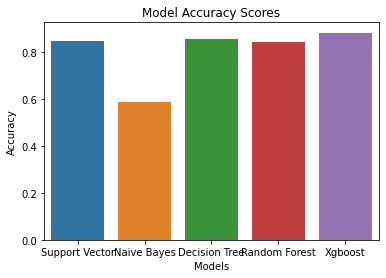

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


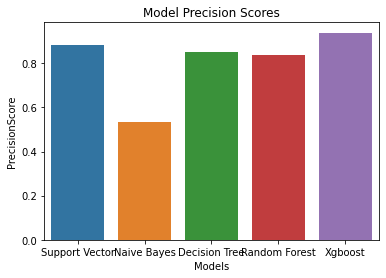

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


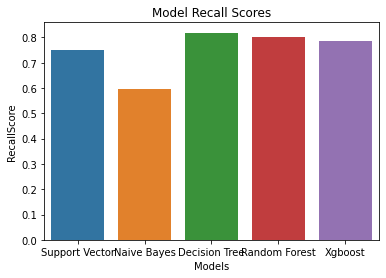

In [52]:
sns.barplot(df['Models'], df['Accuracy'])
plt.title('Model Accuracy Scores')
plt.show()
# %%
sns.barplot(df['Models'], df['PrecisionScore'])
plt.title('Model Precision Scores')
plt.show()
# %%
sns.barplot(df['Models'], df['RecallScore'])
plt.title('Model Recall Scores')
plt.show()